<a href="https://colab.research.google.com/github/qbmed/pyTorchSeq2seq/blob/master/LinearRegressionTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

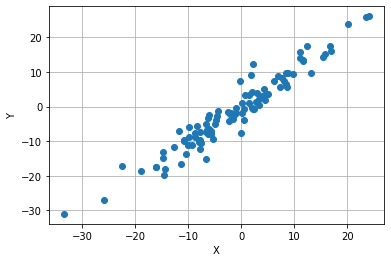

In [38]:
X=10*torch.randn(100,1)
y=X+3*torch.randn(100,1)
plt.plot(X.numpy(),y.numpy(),'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

In [0]:
class LR(nn.Module):
  def __init__(self,input_size,output_size):
    super().__init__()
    self.linear=nn.Linear(input_size,output_size)
  def forward(self,x):
    return self.linear(x)

In [40]:
torch.manual_seed(1)
model=LR(1,1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [0]:
[w,b]=model.parameters()
def get_params():
  return (w[0][0].item(),b[0].item())

In [0]:
def plot_fit(title):
  plt.title=title
  w1,b1=get_params()
  x1=np.array([-30,30])
  y1=w1*x1+b1
  plt.plot(x1,y1,'r')
  plt.scatter(X,y)
  plt.grid(True)
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()

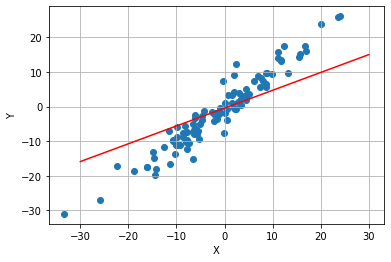

In [43]:
plot_fit('Initial Model')

In [0]:
criterion=nn.MSELoss(reduction='mean')
optimizer=torch.optim.SGD(model.parameters(),lr=0.009)

In [45]:
epochs=100
losses=[]
for i in range(epochs):
  y_pred=model.forward(X)
  loss=criterion(y_pred,y)
  print('epoch:',i,' loss:',loss.item())

  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0  loss: 36.448333740234375
epoch: 1  loss: 31.844823837280273
epoch: 2  loss: 27.999404907226562
epoch: 3  loss: 24.787147521972656
epoch: 4  loss: 22.103687286376953
epoch: 5  loss: 19.861902236938477
epoch: 6  loss: 17.988998413085938
epoch: 7  loss: 16.424192428588867
epoch: 8  loss: 15.116715431213379
epoch: 9  loss: 14.024175643920898
epoch: 10  loss: 13.111157417297363
epoch: 11  loss: 12.348084449768066
epoch: 12  loss: 11.710262298583984
epoch: 13  loss: 11.1770658493042
epoch: 14  loss: 10.731258392333984
epoch: 15  loss: 10.358454704284668
epoch: 16  loss: 10.046642303466797
epoch: 17  loss: 9.785774230957031
epoch: 18  loss: 9.56747817993164
epoch: 19  loss: 9.384745597839355
epoch: 20  loss: 9.231731414794922
epoch: 21  loss: 9.103548049926758
epoch: 22  loss: 8.996118545532227
epoch: 23  loss: 8.906035423278809
epoch: 24  loss: 8.830448150634766
epoch: 25  loss: 8.766982078552246
epoch: 26  loss: 8.713650703430176
epoch: 27  loss: 8.66879653930664
epoch: 28  loss: 

Text(0, 0.5, 'loss')

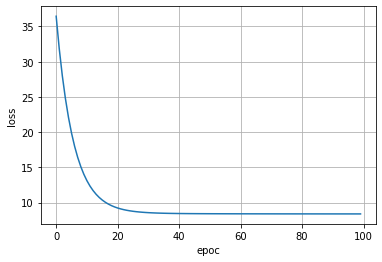

In [46]:
plt.plot(range(epochs),losses)
plt.grid(True)
plt.xlabel('epoc')
plt.ylabel('loss')

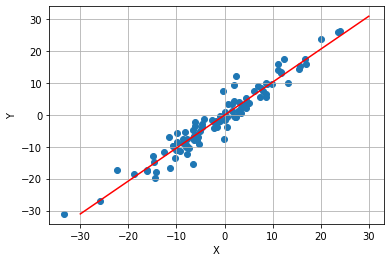

In [47]:
plot_fit('final')